# TP2 Heart Disease #Santé (partie 1)
## Prédiction des patients atteints de maladie cardiovasculaire

Objectif : appréhender et développer toutes les étapes permettant l’utilisation d’une méthode d’apprentissage automatique supervisée

- Exploration de données
- Découper le jeu de données en une partie pour l’apprentissage et l’autre pour le test
- Évaluation et comparaison des différents algorithmes sur les modèles fournis
- Matrice de confusion
- Courbe ROC

Méthodes : 
- Arbre de décision
- Forêts aléatoires


In [1]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("heart.csv")

In [4]:
#Afficher les 10 premières lignes
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


13 variables descriptives dont 7 qualitatives (sex, cp, fbs, restecg, exang, slope, thal) et 6 quantitatives (age, trestbps, chol, thalach, oldpeak, ca)

1 variable cible catégorielle à 2 modalités

- age
- sex (1 = male, 0 = female)
- cp : chest pain type (Value 0: typical angina, Value 1: atypical angina, Value 2: non-anginal pain, Value 3: asymptomatic)
- trestbps : tension artérielle au repos (resting blood pressure) (mm Hg on admission to the hospital)
- chol : serum cholestoral measurement in mg/dl
- fbs : fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false) 
- restecg : resting electrocardiographic results (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
- thalach : fréquence cardiaque maximale atteinte
- exang : exercise induced angina (1 = yes; 0 = no)
- oldpeak : ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG (ElectroCardioGram) plot. See more [here](https://litfl.com/st-segment-ecg-library/))
- slope : the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
- ca : number of major vessels (0-3) colored by flourosopy 
- thal : A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
- target : Heart disease (0 = no, 1 = yes)


**Diagnosis**: The diagnosis of heart disease is done on a combination of clinical signs and test results. The types of tests run will be chosen on the basis of what the physician thinks is going on [1](https://www.mayoclinic.org/diseases-conditions/heart-disease/diagnosis-treatment/drc-20353124), ranging from electrocardiograms and cardiac computerized tomography (CT) scans, to blood tests and exercise stress tests [2](https://www.heartfoundation.org.au/your-heart/living-with-heart-disease/medical-tests).

Looking at information of heart disease risk factors led me to the following: **high cholesterol, high blood pressure, diabetes, weight, family history and smoking** [3](https://www.bhf.org.uk/informationsupport/risk-factors). According to another source [4](https://www.heart.org/en/health-topics/heart-attack/understand-your-risks-to-prevent-a-heart-attack), the major factors that can't be changed are: **increasing age, male gender and heredity**. Note that **thalassemia**, one of the variables in this dataset, is heredity. Major factors that can be modified are: **Smoking, high cholesterol, high blood pressure, physical inactivity, and being overweight and having diabetes**. Other factors include **stress, alcohol and poor diet/nutrition**.

I can see no reference to the 'number of major vessels', but given that the definition of heart disease is **"...what happens when your heart's blood supply is blocked or interrupted by a build-up of fatty substances in the coronary arteries"**, it seems logical the *more* major vessels is a good thing, and therefore will reduce the probability of heart disease.

In [5]:
#Renommer les noms de colonnes
df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

In [6]:
#Types des variables
df.dtypes

age                          int64
sex                          int64
chest_pain_type              int64
resting_blood_pressure       int64
cholesterol                  int64
fasting_blood_sugar          int64
rest_ecg                     int64
max_heart_rate_achieved      int64
exercise_induced_angina      int64
st_depression              float64
st_slope                     int64
num_major_vessels            int64
thalassemia                  int64
target                       int64
dtype: object

In [7]:
#Définir les types appropriés : les variables numériques discrètes deviennent de type object car elles ne sont pas continues
df['sex'] = df['sex'].astype('object')
df['chest_pain_type'] = df['chest_pain_type'].astype('object')
df['fasting_blood_sugar'] = df['fasting_blood_sugar'].astype('object')
df['rest_ecg'] = df['rest_ecg'].astype('object')
df['exercise_induced_angina'] = df['exercise_induced_angina'].astype('object')
df['st_slope'] = df['st_slope'].astype('object')
df['thalassemia'] = df['thalassemia'].astype('object')

In [8]:
#Vérification des nouveaux types
df.dtypes

age                          int64
sex                         object
chest_pain_type             object
resting_blood_pressure       int64
cholesterol                  int64
fasting_blood_sugar         object
rest_ecg                    object
max_heart_rate_achieved      int64
exercise_induced_angina     object
st_depression              float64
st_slope                    object
num_major_vessels            int64
thalassemia                 object
target                       int64
dtype: object

Note : target ne doit pas passer en objet sinon message d'erreur dans l'arbre de décision

<a id='section3'></a>

# Exploration des données

In [9]:
df.describe()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604,0.729373,0.544554
std,9.082101,17.538143,51.830751,22.905161,1.161075,1.022606,0.498835
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000,0.000000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000,0.000000,1.000000
75%,61.000000,140.000000,274.500000,166.000000,1.600000,1.000000,1.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,4.000000,1.000000


In [10]:
#Analyse des moyennes des variables discrétisées par la variable cible target (deux modalitéS 0 ou 1, sain ou malade respectivement)
df.groupby('target').mean()
#Elle sera effectuée uniquement sur les variables quantitatives

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels
target,,,,,,
0,56.601449,134.398551,251.086957,139.101449,1.585507,1.166667
1,52.496970,129.303030,242.230303,158.466667,0.583030,0.363636


## Analyse univariable de la variable cible

In [11]:
#Nombre d'individus discrétisés par la variable cible
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

Dans notre jeu de données, il y a plus de patients atteints de maladie cardiovasculaire (165) que de patients non atteints (138).

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns #for plotting

Text(0.5, 0, 'Cible')

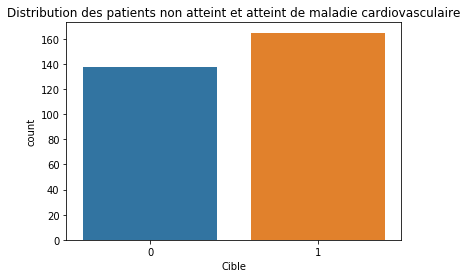

In [13]:
#Variable cible
sns.countplot(x="target", data=df)
plt.title('Distribution des patients non atteint et atteint de maladie cardiovasculaire')
plt.xlabel("Cible")

## Analyse univariable du sexe

Text(0.5, 1.0, 'Distribution des patients par leur sexe')

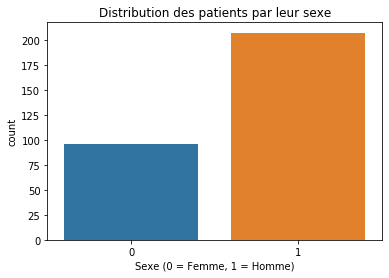

In [14]:
sns.countplot(x='sex', data=df)
plt.xlabel("Sexe (0 = Femme, 1 = Homme)")
plt.title("Distribution des patients par leur sexe")

In [15]:
#Tableau croisé
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,24,72
1,114,93


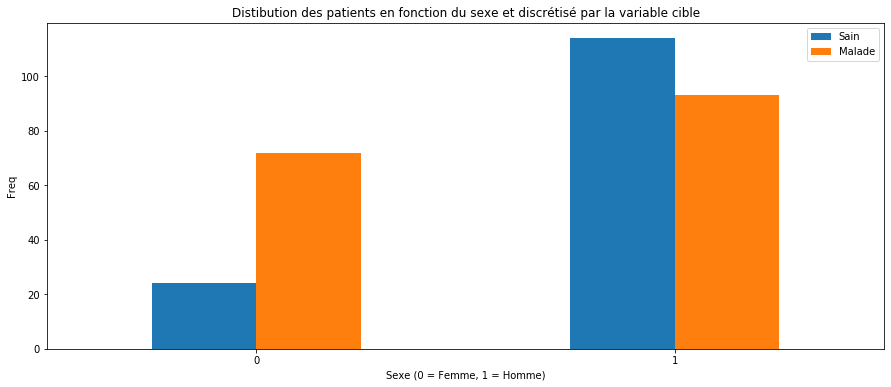

In [16]:
pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(15,6))
plt.title('Distibution des patients en fonction du sexe et discrétisé par la variable cible')
plt.xlabel('Sexe (0 = Femme, 1 = Homme)')
plt.xticks(rotation=0)
plt.legend(["Sain", "Malade"])
plt.ylabel('Freq')
plt.show()

In [31]:
#Exemple de double condition
df_femme_pain0 = df [(df["sex"] == 0) & (df['chest_pain_type']==0)]

In [32]:
df_femme_pain0.head(10)

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
43,53,0,0,130,264,0,0,143,0,0.4,1,0,2,1
49,53,0,0,138,234,0,0,160,0,0.0,2,0,2,1
59,57,0,0,128,303,0,0,159,0,0.0,2,1,2,1
65,35,0,0,138,183,0,1,182,0,1.4,2,0,2,1
69,62,0,0,124,209,0,1,163,0,0.0,2,0,2,1
84,42,0,0,102,265,0,0,122,0,0.6,1,0,2,1
89,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
96,62,0,0,140,394,0,0,157,0,1.2,1,0,2,1
107,45,0,0,138,236,0,0,152,1,0.2,1,0,2,1


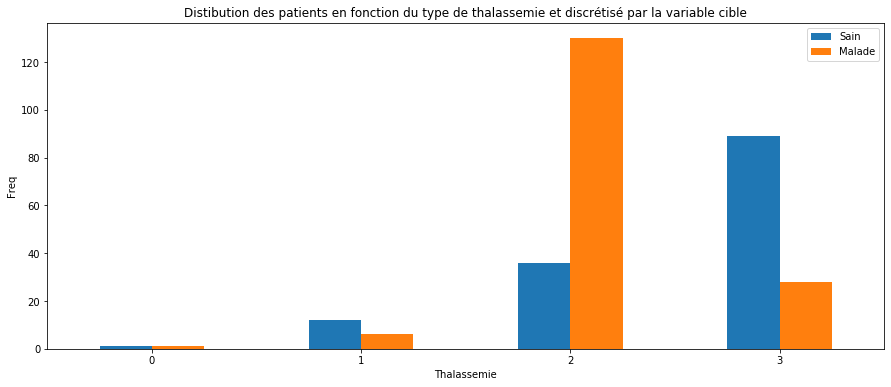

In [19]:
pd.crosstab(df.thalassemia, df.target).plot(kind="bar",figsize=(15,6))
plt.title('Distibution des patients en fonction du type de thalassemie et discrétisé par la variable cible')
plt.xlabel('Thalassemie')
plt.xticks(rotation=0)
plt.legend(["Sain", "Malade"])
plt.ylabel('Freq')
plt.show()

## Analyse univariable de l'âge

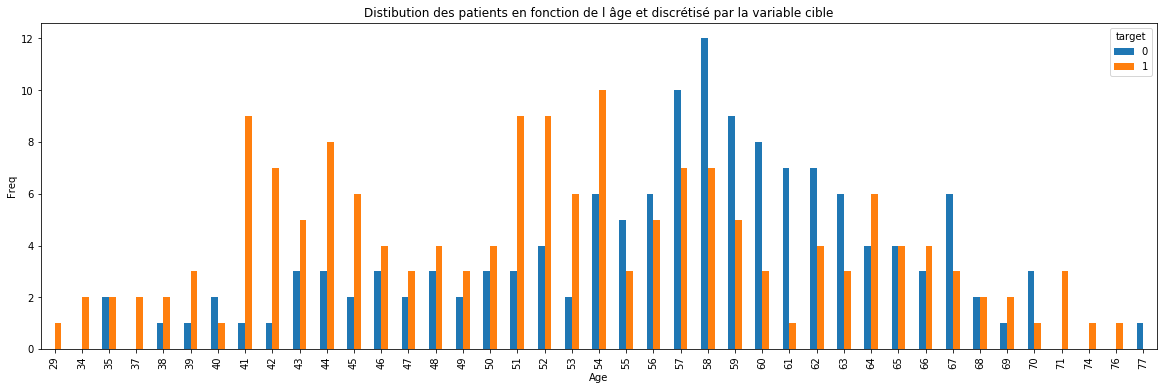

In [20]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6))
plt.title('Distibution des patients en fonction de l âge et discrétisé par la variable cible')
plt.xlabel('Age')
plt.ylabel('Freq')
plt.show()

#plt.savefig('heartDiseaseAndAges.png')

## Analyse univariable de la tension artérielle au repos

Text(0.5, 1.0, 'Distribution de la tension artérielle au repos')

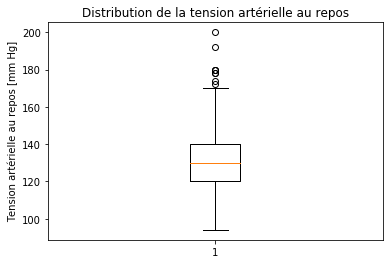

In [21]:
#Variable resting_blood_pressure
bx = plt.boxplot(df['resting_blood_pressure'])
plt.ylabel('Tension artérielle au repos [mm Hg]')
plt.title('Distribution de la tension artérielle au repos')

Il y a quelques patients qui ont une tension artérielle au repos "abérrante".

Est-ce que ces tensions anormalement très élevé auraient un impact sur la variable cible ? 

9


Text(0.5, 1.0, 'Distribution des outliers de la tension artérielle au repos')

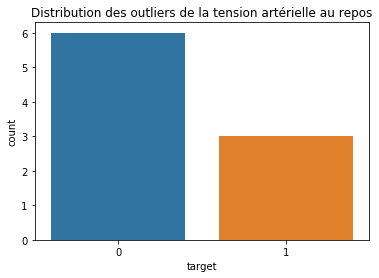

In [22]:
#Récupérer les outliers
seuil = bx['whiskers'][1]._yorig[1]
outliers = df[df["resting_blood_pressure"]> seuil]
print(len(outliers))

#Figure
sns.countplot(x='target', data=outliers)
plt.title('Distribution des outliers de la tension artérielle au repos')

Nous analysons plus particulièrement ces 9 outliers, il s'avère que 6 sont des patients sains et 3 sont des patients atteints de maladie cardiovasculaire.

Text(0.5, 1.0, 'Patients malades')

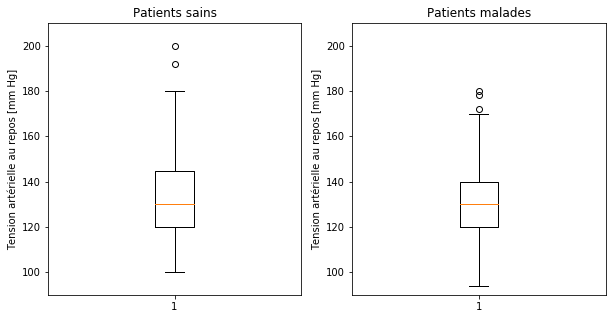

In [23]:
#Figure distribution des tension artérielles au repos discrétisé par variable cible
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.boxplot(df[df['target']==0]['resting_blood_pressure'])
plt.ylim([90,210])
plt.ylabel('Tension artérielle au repos [mm Hg]')
plt.title('Patients sains')

plt.subplot(1,2,2)
plt.boxplot(df[df['target']==1]['resting_blood_pressure'])
plt.ylim([90,210])
plt.ylabel('Tension artérielle au repos [mm Hg]')
plt.title('Patients malades')

0         AxesSubplot(0.1,0.15;0.363636x0.75)
1    AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

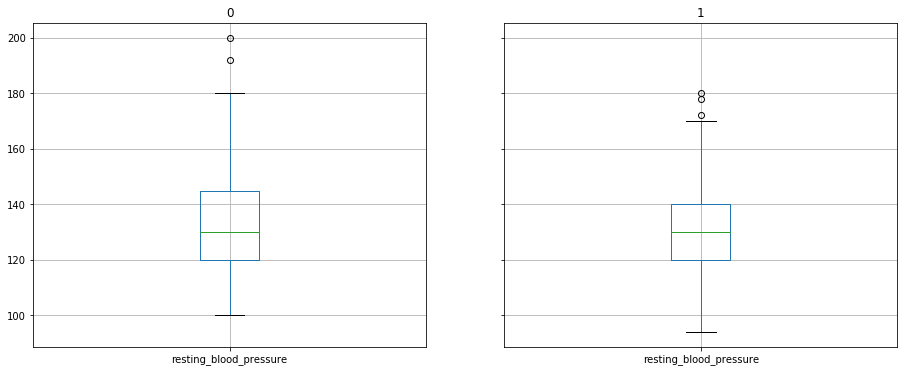

In [24]:
#Equivalent
df.groupby('target').boxplot(column='resting_blood_pressure', figsize=(15,6))

## Analyse bivariable : age et fréquence cardiaque maximale atteinte

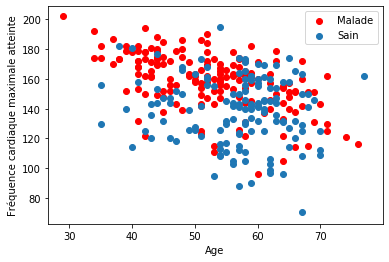

In [25]:
plt.scatter(x=df.age[df.target==1], y=df.max_heart_rate_achieved[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.max_heart_rate_achieved[(df.target==0)])
plt.legend(["Malade", "Sain"])
plt.xlabel("Age")
plt.ylabel("Fréquence cardiaque maximale atteinte")
plt.show()

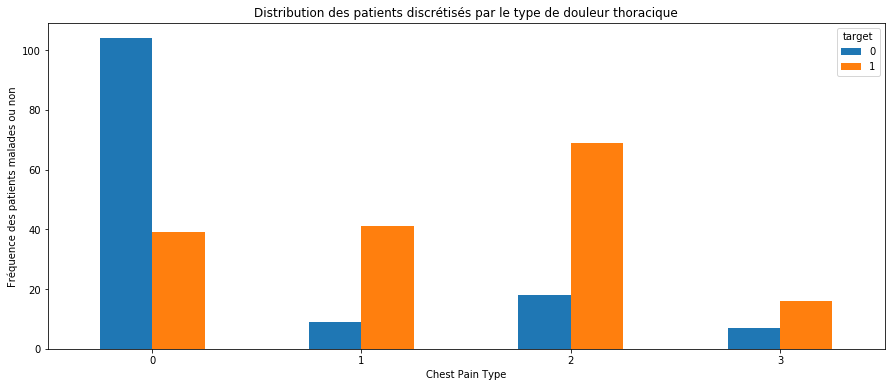

In [26]:
pd.crosstab(df.chest_pain_type,df.target).plot(kind="bar",figsize=(15,6))
plt.title('Distribution des patients discrétisés par le type de douleur thoracique')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Fréquence des patients malades ou non')
plt.show()

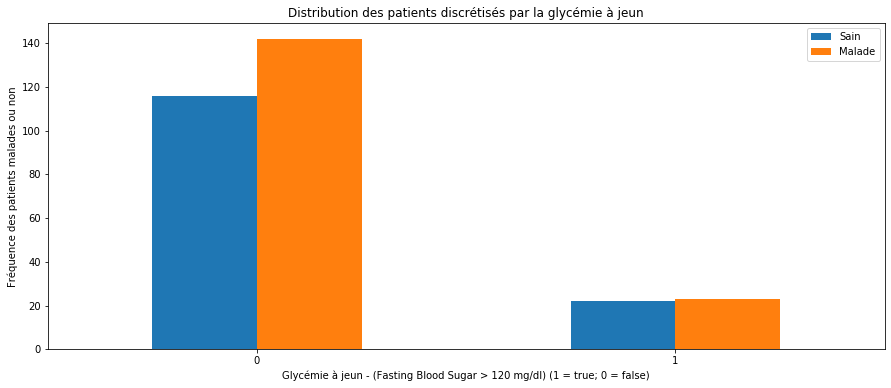

In [27]:
pd.crosstab(df.fasting_blood_sugar, df.target).plot(kind="bar",figsize=(15,6))
plt.title('Distribution des patients discrétisés par la glycémie à jeun')
plt.xlabel('Glycémie à jeun - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Sain", "Malade"])
plt.ylabel('Fréquence des patients malades ou non')
plt.show()

In [28]:
df

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


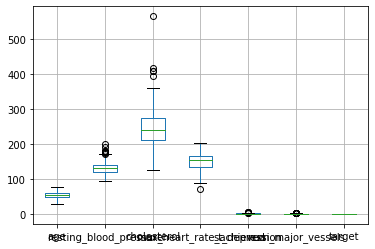

In [29]:
#Boites à moustaches
df.boxplot()